In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Read the CSV
df = pd.read_csv("./results/summary_duration_table.csv", index_col=0)
df.dropna(how="all", inplace=True)
df.dropna(axis=1, how="all", inplace=True)
df.columns = [col.capitalize() for col in df.columns]

# Reorder the rows as specified
order = [
    "5x5 normal",
    "6x6 normal",
    "8x8 normal",
    "6x6 wormhole",
    "8x8 wormhole"
]
df = df.loc[order]

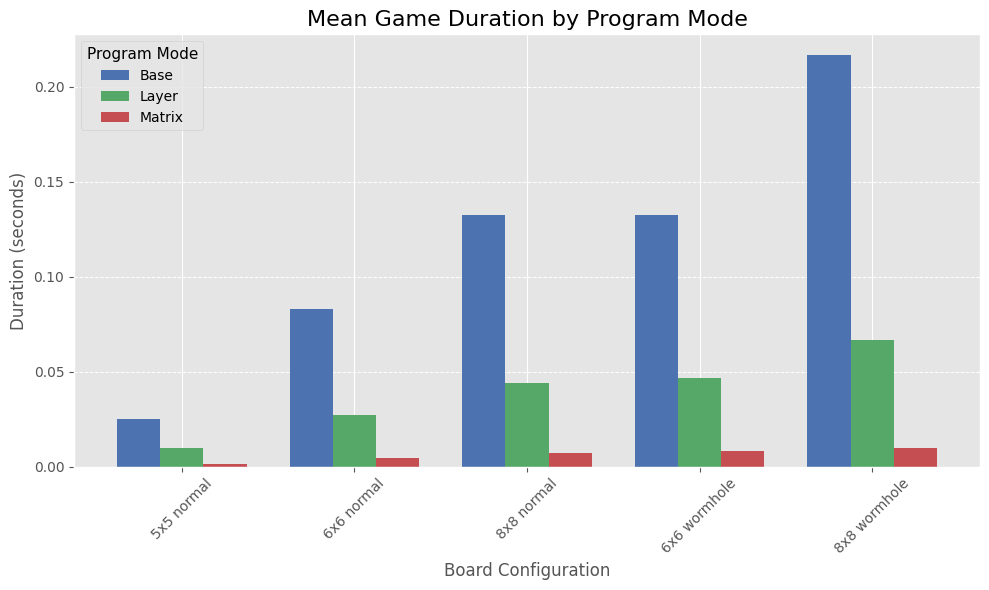

In [4]:
# -------------------------------
# Bar Plot with styling
# -------------------------------
plt.style.use("ggplot")
colors = ['#4C72B0', '#55A868', '#C44E52']  # Custom palette

df.plot(kind="bar", figsize=(10, 6), color=colors, width=0.75)
plt.title("Mean Game Duration by Program Mode", fontsize=16)
plt.ylabel("Duration (seconds)", fontsize=12)
plt.xlabel("Board Configuration", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title="Program Mode", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig("styled_bar_plot.png", dpi=300, transparent=True)
plt.show()

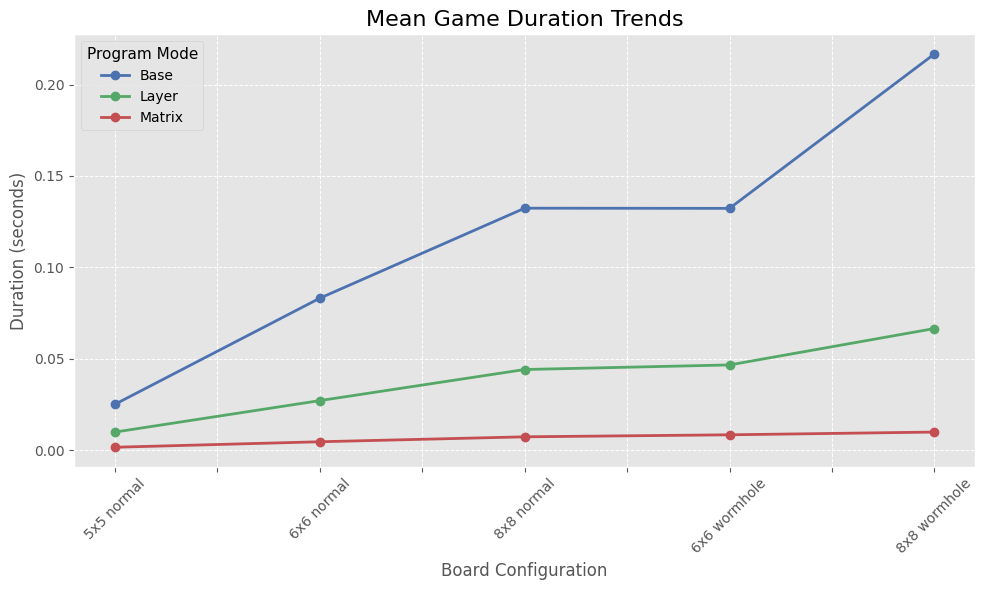

In [5]:
# -------------------------------
# Line Plot with styling
# -------------------------------
df.plot(marker='o', figsize=(10, 6), linewidth=2, markersize=6, color=colors)
plt.title("Mean Game Duration Trends", fontsize=16)
plt.ylabel("Duration (seconds)", fontsize=12)
plt.xlabel("Board Configuration", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(title="Program Mode", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig("styled_line_plot.png", dpi=300, transparent=True)
plt.show()

In [6]:
# -------------------------------
# Ratio Table
# -------------------------------
ratio_df = pd.DataFrame({
    "Base / Matrix": (df["Base"] / df["Matrix"]).round(2),
    "Base / Layer": (df["Base"] / df["Layer"]).round(2)
})

print("\n📊 Speedup Ratios:\n")
print(ratio_df.to_string())

# Save ratio table
ratio_df.to_csv("./resultsratio_table.csv")


📊 Speedup Ratios:

              Base / Matrix  Base / Layer
5x5 normal            14.82          2.52
6x6 normal            17.70          3.06
8x8 normal            17.89          3.00
6x6 wormhole          15.56          2.83
8x8 wormhole          21.67          3.25


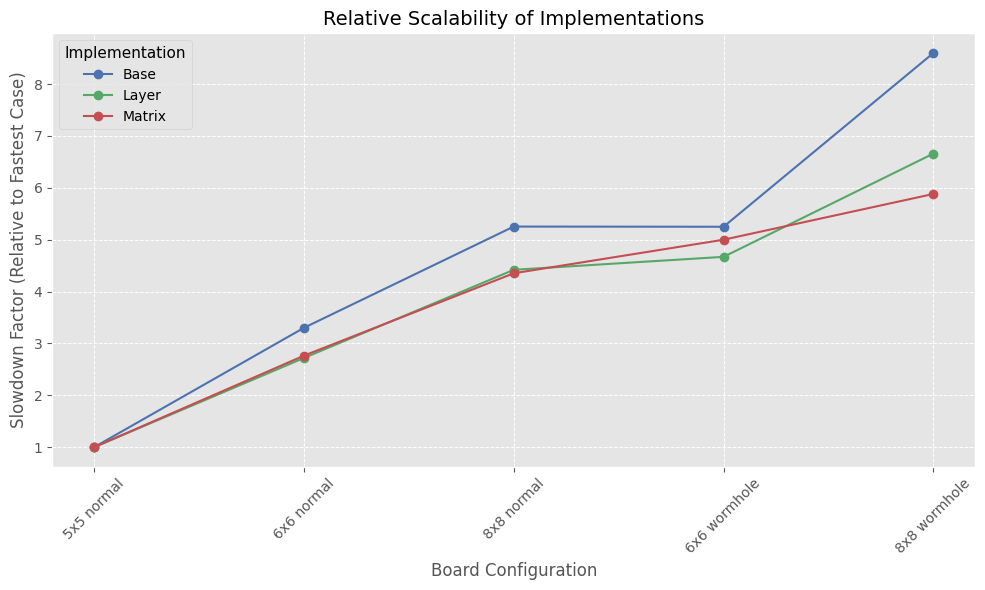

In [7]:
# Normalize each implementation to its own minimum
normalized = df / df.min()

plt.figure(figsize=(10, 6))
for col, color in zip(normalized.columns, colors):
    plt.plot(normalized.index, normalized[col], marker='o', label=col, color=color)

plt.title("Relative Scalability of Implementations", fontsize=14)
plt.xlabel("Board Configuration", fontsize=12)
plt.ylabel("Slowdown Factor (Relative to Fastest Case)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(title="Implementation", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig("relative_scalability_plot.png", dpi=300, transparent=True)
plt.show()

# Paralelized

In [8]:
# Load threaded timing data
df_paralel = pd.read_csv("./results/summary_parallelization.csv", index_col=0)
df_paralel.dropna(how="all", inplace=True)
df_paralel.dropna(axis=1, how="all", inplace=True)
df_paralel.columns = [col.capitalize() for col in df_paralel.columns]

df_paralel = df_paralel.loc[order]

In [9]:
overhead_factor = 0.6 # because when looking at the number of simulations it was much more than the average time was showing 
corrected_df = df_paralel * overhead_factor

# Extract baseline times from baseline_df's 'Matrix' column (capitalized)
baseline_times = df['Matrix']

In [10]:
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974']

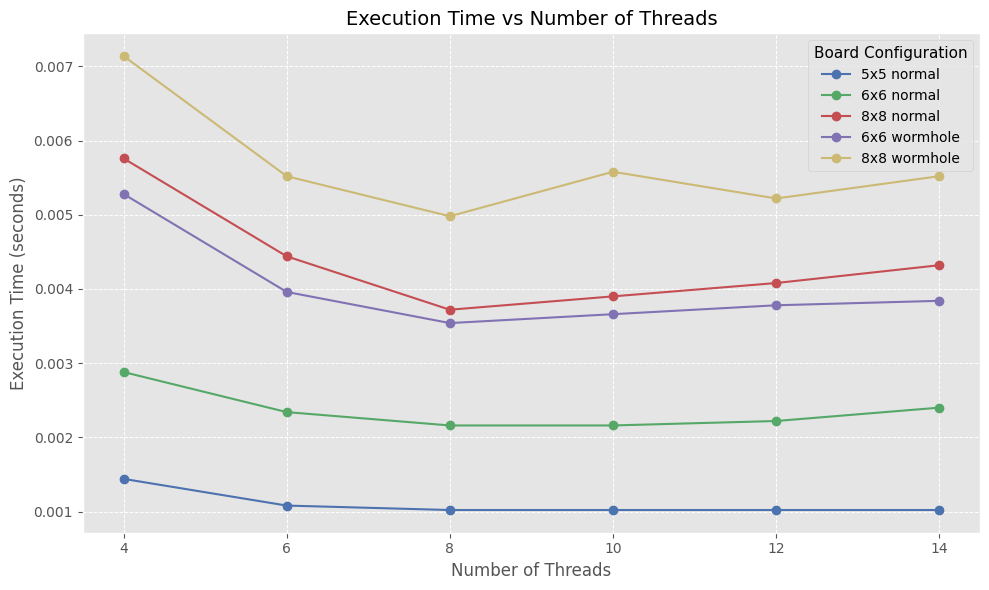

In [14]:

# -------- Plot: Execution Time vs Number of Threads --------
plt.figure(figsize=(10, 6))
for i, (idx, row) in enumerate(corrected_df.iterrows()):
    plt.plot(corrected_df.columns, row, marker='o', label=idx, color=colors[i % len(colors)])

plt.title("Execution Time vs Number of Threads", fontsize=14)
plt.xlabel("Number of Threads", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(title="Board Configuration", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig("execution_time_vs_threads.png", dpi=300, transparent=True)
plt.show()


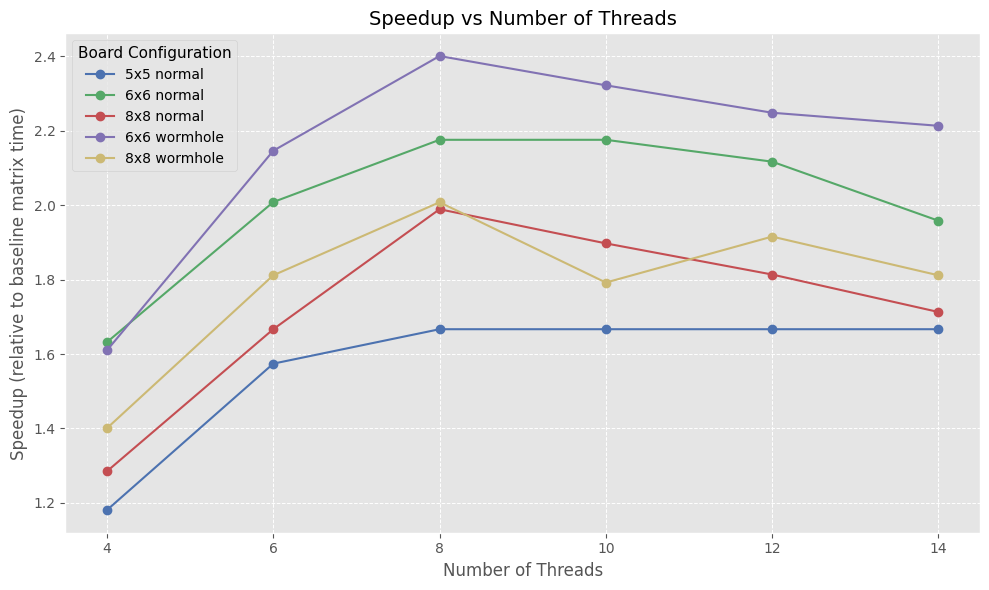

In [13]:

# -------- Plot: Speedup vs Number of Threads --------
speedup = corrected_df.copy()
for idx in corrected_df.index:
    speedup.loc[idx, :] = baseline_times[idx] / corrected_df.loc[idx, :]

plt.figure(figsize=(10, 6))
for i, (idx, row) in enumerate(speedup.iterrows()):
    plt.plot(speedup.columns, row, marker='o', label=idx, color=colors[i % len(colors)])

plt.title("Speedup vs Number of Threads", fontsize=14)
plt.xlabel("Number of Threads", fontsize=12)
plt.ylabel("Speedup (relative to baseline matrix time)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(title="Board Configuration", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.savefig("speedup_vs_threads.png", dpi=300, transparent=True)
plt.show()
